# Week 8: LRC Resonance


## Name (Group H on Learn): Quinn Mangous, Blake Teague-Dolan

The aim of this experiment was to measure the bandwidth and Q factor of a resonance LRC series circuit.

We found $\omega_0 = (3457.31 ± 0.07)$ rad Hz ($f_0 =550.247 ± 0.012$ Hz), $\gamma = (161.22 ± 0.20)$ rad Hz, $I_{max} = (86.29 ± 0.04)$ mA. 

Using $\gamma = \frac{R}{L}$, the resistance of the coil is $R = (24.39 ± 0.09)$ ohms.
 
Using $Q = \frac{V_C}{V_s}$, we calculated $Q=22.2 ± 1.1$. We also calculated $Q=\frac{\omega_0}{\gamma}=21.444 ± 0.027$. These values agree with each other.

In [2]:
### Imports, global variables and functions

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

u0 = 1.25663706 * 10**(-6)             # Permeability of free space [m kg s^-2 A^-2]
N = 1500                               # Turns of copper wire in inductor coil
Vs = 2.077                             # Source voltage [V]
r_theo = 0.04                          # Assumption of average radius [m] (4 cm)
f0_want, w0_want = 550, 550*2*np.pi    # What we want our resonant frequency to be [Hz]
f0_exp = 596                           # Frequency at theoretical capacitance [Hz]

del_I = 0.1e-3                         # Uncertainty in current [A]
del_f = 1                              # Uncertainty in frequency [Hz]

def get_L_theo(u0, N, r):
    """Inductance of coil [H] assuming average radius is 4 cm"""
    return 0.5 * np.pi * u0 * N**2 * r

def get_C(f0, L, del_L):
    """Capacitance [F] with resonant frequency f0 and inductance L"""
    C = 1 / (4 * np.pi**2 * f0**2 * L)
    del_C = 1 / (4 * np.pi**2 * f0**2 * L**2) * del_L
    return C, del_C

def get_L_exp(f0, C, del_f):
    """Experimental inductance [H] at theoretical capacitance"""
    L_exp = 1 / (4 * np.pi**2 * f0**2 * C) 
    del_L_exp = 2 / (4 * np.pi**2 * f0**3 * C) * del_f
    return L_exp, del_L_exp

def get_r_exp(L_exp, u0, N, del_L):
    """Equivalent radius [m] to experimental inductance"""
    r_exp = 2 * L_exp / (np.pi * u0 * N**2)
    del_r_exp = 2 / (np.pi * u0 * N**2) * del_L
    return r_exp, del_r_exp

def current_with_w(w, w0, gamma, I_max):
    """Current as a function of angular frequency"""
    top = gamma * w * I_max
    bottom = np.sqrt(w**2 * gamma**2 + (w**2 - w0**2)**2)
    return top / bottom

def get_del_R(L, del_L, gamma, del_gamma):
    """Uncertainty in resistance from formula gamma = R/L"""
    dR_dgamma = L
    dR_dL = gamma
    return np.sqrt((dR_dgamma*del_gamma)**2 + (dR_dL*del_L)**2)

def current_with_C(C, w, R, L, Vs):
    """Current as a function of capacitance"""
    return Vs / np.sqrt(R**2 + (w*L - 1/(w*C))**2)

def get_Q1(V_C_Q1, V_s_Q1, del_V):
    """Quality factor defined by voltage across the capacitor at resonance
    divided by voltage across the source at resonance"""
    Q1 = V_C_Q1 / V_s_Q1
    del_Q1 = del_V * np.sqrt((-V_C_Q1/V_s_Q1**2)**2 + (1/V_s_Q1)**2)
    return Q1, del_Q1

def get_Q2(w0, del_w0, gamma, del_gamma):
    """Quality factor defined by resonant angular frequency divided by bandwidth"""
    Q2 = w0 / gamma
    del_Q2 = np.sqrt((1/gamma * del_w0)**2 + (-w0/gamma**2 * del_gamma)**2)
    return Q2, del_Q2

In [3]:
### Necessary values

L_theo = get_L_theo(u0, N, r_theo)                     # Inductance of coil [H] assuming average radius is 4 cm

C_theo, NA = get_C(f0_want, L_theo, 0)                 # Theoretical capacitance [F] to get resonant frequency of 550 Hz 
                                                       # with theoretical inductance
    
L_exp, del_L_exp = get_L_exp(f0_exp, C_theo, del_f)    # Experimental inductance [H] at theoretical capacitance

r_exp, del_r_exp = get_r_exp(L_exp, u0, N, del_L_exp)  # Equivalent radius

C_exp, del_C_exp = get_C(f0_want, L_exp, del_L_exp)    # Capacitance to get resonant frequency of 550 Hz with experimental inductance

I_max = 86.7e-3                                        # Max current [A] (current at resonant frequency, 550 Hz)

print(f"Inductance should be {L_theo:.4f} H.")
print(f"Capacitance should be {C_theo*10**6:.4f} uF.")
print(f"Measured inductance is ({L_exp:.4f} ± {del_L_exp:.4f}) H.")
print(f"Equivalent inductor radius is ({r_exp*100:.3f} ± {del_r_exp*100:.3f}) cm.")
print(f"Capacitance is ({C_exp*10**6:.4f} ± {del_C_exp*10**6:.4f})uF.")
print(f"The max current is ({I_max*10**3} ± {del_I*10**3}) mA.")

Inductance should be 0.1777 H.
Capacitance should be 0.4713 uF.
Measured inductance is (0.1513 ± 0.0005) H.
Equivalent inductor radius is (3.406 ± 0.011) cm.
Capacitance is (0.5535 ± 0.0019)uF.
The max current is (86.7 ± 0.1) mA.


Assuming the average radius of the wire coils is $r=4$ cm, the inductance should be $L=0.1777$ H.

To get a resonance of $f_0=550$ Hz with an inductance $L=0.1777$ H, the capacitance should be $C=0.4713$ uF.

At $C=0.4713$ uF and resonance frequency of $f_0 = 596$ Hz, we measured the inductance to be $L=(0.1513 ± 0.0005)$ H.

The equivalent radius of the inductor is $r=(3.406 ± 0.011)$ cm.

With an inductance of $L=0.1513$ H, the capacitance to get a resonance frequency of $f_0=550$ Hz is $C=(0.5535 ± 0.0019)$ uF.

The max current with inductance $L=0.1513$ H and capacitance $C=0.5535$ uF is $I_{max}=(86.7 ± 0.1)$ mA at $f_0=550$ Hz.


Resonant angular frequency is w0 = (3457.31 ± 0.07) rad Hz.
f0 = (550.247 ± 0.012) Hz.
Bandwidth is gamma = (161.22 ± 0.20) rad Hz.
Max current is I_max = (86.29 ± 0.04) mA.
Resistance of the coil is R = (24.39 ± 0.09) ohms.


Text(0, 0.5, 'Current [A]')

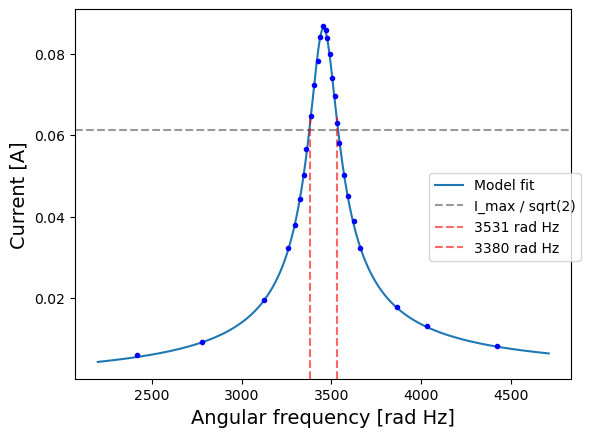

In [7]:
### Part 10.4

f_w = np.array([550, 497, 533, 553, 615, 642, 519, 704, 385,        # Frequencies [Hz] for part 10.4
                   564, 572, 583, 552, 556, 560, 545, 535, 539, 
                   542, 525, 529, 568, 577, 558, 562, 442, 547])
I_w = np.array([86.7, 19.4, 50.2, 83.9, 17.8, 13.1, 32.2, 8.3,
                   5.9, 58.1, 45, 32.3, 85.8, 79.9, 69.5, 78.2, 
                   56.5, 64.6, 72.3, 38, 44.2, 50.3, 38.8, 74, 
                   62.9, 9.3, 84.2]) * 10**(-3)                     # Measured current [A] from f_w
w_w = f_w * 2 * np.pi                                               # Converting to angular frequencies

freq_1, freq_2 = 562*2*np.pi, 538*2*np.pi                           # Frequencies [rad Hz] where current was I_max / sqrt(2)
gamma = freq_1 - freq_2                                             # Bandwidth [rad Hz]

w_array = np.linspace(350, 750, 1001)*2*np.pi
params_guess_w = [w0_want, gamma, I_max]                            # Guess parameters
del_I_w_array = np.ones_like(I_w) * del_I

new_params_w, pcov_w = scipy.optimize.curve_fit(current_with_w, w_w, I_w, p0=params_guess_w, sigma=del_I_w_array, absolute_sigma=True)
params_err_w = np.sqrt(np.diag(pcov_w))
w0_1, gamma_1, I_max_1 = new_params_w[0], new_params_w[1], new_params_w[2]
del_w0_1, del_gamma_1, del_I_max_1 = params_err_w[0], params_err_w[1], params_err_w[2]
R = gamma_1 * L_exp
del_R = get_del_R(L_exp, del_L_exp, gamma_1, del_gamma_1)
print(f"Resonant angular frequency is w0 = ({w0_1:.2f} ± {del_w0_1:.2f}) rad Hz.")
print(f"f0 = ({w0_1/(2*np.pi):.3f} ± {del_w0_1/(2*np.pi):.3f}) Hz.")
print(f"Bandwidth is gamma = ({gamma_1:.2f} ± {del_gamma_1:.2f}) rad Hz.")
print(f"Max current is I_max = ({I_max_1*10**3:.2f} ± {del_I_max_1*10**3:.2f}) mA.")
print(f"Resistance of the coil is R = ({R:.2f} ± {del_R:.2f}) ohms.")

ax = plt.axes()
ax.errorbar(w_w, I_w, del_I, color='b', fmt=".")
ax.plot(w_array, current_with_w(w_array, *new_params_w), color='C0', label="Model fit")
ax.axhline(I_max / np.sqrt(2), color = 'k', alpha = 0.4, linestyle = '--', label="I_max / sqrt(2)")
ax.axvline(freq_1, ymax = (I_max / np.sqrt(2)) / I_max, color = 'r', alpha = 0.6, linestyle = '--', label=f"{freq_1:.0f} rad Hz")
ax.axvline(freq_2, ymax = (I_max / np.sqrt(2)) / I_max, color = 'red', alpha = 0.6, linestyle = '--', label=f"{freq_2:.0f} rad Hz")
ax.ticklabel_format(useOffset=False)
ax.legend(bbox_to_anchor=(0.7,0.3))
ax.set_xlabel('Angular frequency [rad Hz]', fontsize=14)
ax.set_ylabel('Current [A]', fontsize=14)

Above, we plotted current as a function of angular frequency, with our fitted model, and found the resonant angular frequency to be $\omega_0 = (3457.31 ± 0.07)$ rad Hz, our bandwidth is $\gamma = (161.22 ± 0.20)$ rad Hz, and our max current is $I_{max} = (86.29 ± 0.04)$ mA. Using $\gamma = \frac{R}{L}$, the resistance of the coil is $R = (24.39 ± 0.09)$ ohms.

Below, we plotted current as a function of capacitance and fitted the data.

Text(0, 0.5, 'Current [A]')

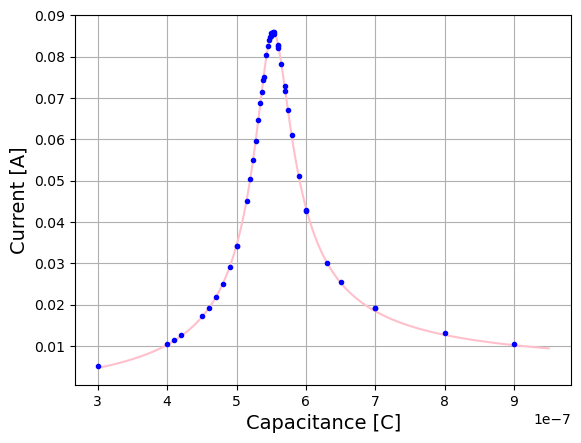

In [5]:
### Part 10.5

C = np.array([0.554, 0.4, 0.3, 0.41, 0.42, 0.46, 0.45, 0.47, 0.48, 0.49, 0.5,           # Capacitance [F]
              0.9, 0.8, 0.7, 0.6, 0.5, 0.54, 0.56, 0.57, 0.58, 0.56, 0.564, 0.554, 
              0.553, 0.552, 0.551, 0.55, 0.549, 0.548, 0.547, 0.545, 0.543, 0.538, 
              0.536, 0.534, 0.531, 0.528, 0.524, 0.52, 0.515, 0.59, 0.6, 0.7, 0.65, 
              0.63, 0.57, 0.56, 0.574]) * 10**(-6)
I_C = np.array([85.9, 10.6, 5.1, 11.5, 12.6, 19.1, 17.3, 21.8, 24.9, 29.1, 34.1, 
                10.6, 13.2, 19.1, 42.9, 34.2, 75.2, 82.9, 72.8, 61, 82.2, 78.3, 85.6, 
                85.8, 85.9, 85.8, 85.7, 85.1, 84.7, 84.1, 82.5, 80.5, 74.3, 71.5, 68.8, 
                64.6, 59.7, 55.0, 50.4, 45.2, 51.1, 42.6, 19.1, 25.5, 30.0, 71.8, 82.7, 
                67.1]) * 10**(-3)


C_array = np.linspace(0.3, 0.95, 1001) * 10**(-6)
params_guess_C = [w0_want, R, L_exp, Vs]
del_I_C_array = np.ones_like(I_C) * del_I

new_params_C, pcov_C = scipy.optimize.curve_fit(current_with_C, C, I_C, p0=params_guess_C, sigma=del_I_C_array, absolute_sigma=True)

# I_C_max = 85.9e-3, Part 10.5 was done the day after 10.4, so I_max is not the same

# params_err_C = np.sqrt(np.diag(pcov_C))
# w0_2, R_2, L_exp_2, Vs_2 = new_params_C[0], new_params_C[1], new_params_C[2], new_params_C[3]
# del_w0_2, del_R_2, del_L_exp_2, del_Vs_2 = params_err_C[0], params_err_C[1], params_err_C[2], params_err_C[3]

# print(f"Resonant angular frequency is w0 = ({w0_2:.2f} ± {del_w0_2:.2f}) rad Hz.")
# print(f"f0 = ({w0_2/(2*np.pi):.3f} ± {del_w0_2/(2*np.pi):.3f}) Hz.")
# print(f"Resistance of the coil is R = ({R_2:.2f} ± {del_R_2:.2f}) ohms.")
# print(f"Inductance is L = ({L_exp_2:.4f} ± {del_L_exp_2:.4f}) H.")
# print(f"Source voltage is Vs = ({Vs_2:.4f} ± {del_Vs_2:.4f}) V.")

### Talked to Michael about this, these parameters depend on each other too much to accurately 
### determine what they are, so we should just have the plot and use our numbers from part 10.4

ax = plt.axes()
ax.errorbar(C, I_C, del_I, color='b', fmt=".")
ax.plot(C_array, current_with_C(C_array, *new_params_C), color='pink')
ax.ticklabel_format(useOffset=False)
ax.grid(True)
ax.set_xlabel('Capacitance [C]', fontsize=14)
ax.set_ylabel('Current [A]', fontsize=14)

$Q = \frac{V_C}{V_R} = \frac{V_C}{V_s}$ all at resonance because the impedance of the circuit is equal to the resistance at resonance. This means $V_s = IZ = IR = V_R$

In [6]:
### Part 10.6 and 10.7

V_C_Q1, V_s_Q1 = 46.0, 2.073                                           # Voltages [V] across capacitor and source

del_V = 0.1                                                            # Uncertainty [V] of voltmeter

Q1, del_Q1 = get_Q1(V_C_Q1, V_s_Q1, del_V)
print(f"The Q factor using Q = V_C/V_s is {Q1:.1f} ± {del_Q1:.1f}.")

Q2, del_Q2 = get_Q2(w0_1, del_w0_1, gamma_1, del_gamma_1)              # Using fitted angular frequency and bandwidth
print(f"The Q factor using Q = w0/gamma is {Q2:.3f} ± {del_Q2:.3f}.")

The Q factor using Q = V_C/V_s is 22.2 ± 1.1.
The Q factor using Q = w0/gamma is 21.444 ± 0.027.


Above, using $Q = \frac{V_C}{V_s}$, measured the voltage across our source and capacitor and found $Q=22.2 ± 1.1$. Using our fitted values from before, we also calculated $Q=\frac{\omega_0}{\gamma}=21.444 ± 0.027$. These values agree with each other

Below, we calculated that the circuit needs a resistance of $105$ ohms to have a Q factor of $5$. However, during the experiment, we forgot to subtract the internal resistance of the inductor from this value, so we set the variable resistor to $105$ ohms, as opposed to $105 - 24 = 81$ ohms. Since $\gamma = \frac{R}{L}$ and $Q = \frac{\omega_0}{\gamma} = \frac{\omega_0 L}{R}$, our Q factor should be smaller than $5$, as our resistance is higher, and thus dampen faster. Our Q value came out to be around $3.6$. Therefore, our values are reasonable and valid to use for part 10.9 (with Michae's approval).

However furthermore, the value for resistance that the graph from part 10.8 returned (via R = gamma*L) was around $145$ ohms, which is greater than expected when summing the R of the resistance decade box and the inductor (which, as earlier stated, should be about $129$ ohms) by about $16$ ohms. This is unexpected as there should not be non-negligible resistance from anything in the circuit other than the inductor and resistance decade box. This could be explained by the gamma (bandwidth) of the graph being off. The gamma value required for the $R=145$ ohms is about $853$ rad Hz, which is well outside the determined error range of $958 \pm 7$ rad Hz, quite a substantial difference.



In [7]:
### Part 10.8

# Smallest adjustment of variable resistor is 1 ohm, so round to nearest "ones" place

Q_want = 5                                                              # Q factor aim
R_want = w0_1 * L_exp / Q_want                                          # Required resistance for Q = 5                        
print(f"The circuit needs resistance {R_want:.0f} ohms for Q = 5.")

R_tot = R_want + R                                                      # Actual bandwidth and resistance of circuit
gamma_actual = R_tot / L_exp
del_gamma_actual = R_tot / L_exp**2 * del_L_exp
Q_actual, del_Q_actual = get_Q2(w0_1, del_w0_1, gamma_actual, del_gamma_actual)
print(f"Circuit will have eqiuvalent R = {R_tot:.0f} ohms.")
print(f"Circuit will have Q = {Q_actual:.3f} ± {del_Q_actual:.3f}.")

The circuit needs resistance 105 ohms for Q = 5.
Circuit will have eqiuvalent R = 129 ohms.
Circuit will have Q = 4.055 ± 0.014.


The circuit needs an equivalent resistance of $R=105$ ohms to have a Q factor of $5$.
However, because of the mistake explained above, the circuit has an eqiuvalent resistance of $R=129$ ohms.
This means our circuit will have a Q factor of $Q=4.055 ± 0.014$.

Below, using the model fit, we found $Q=3.607 ± 0.027$. This does not agree with the calculated $Q=4.055 ± 0.014$, along with the value for resistance as discussed above.

Resonant angular frequency is w0 = (3453.9 ± 2.5) rad Hz.
f0 = (549.7 ± 0.4) Hz.
Bandwidth is gamma = (958 ± 7) rad Hz.
Max current is I_max = (15.35 ± 0.04) A.
Resistance of the coil is R = (144.9 ± 1.2) ohms.
The Q factor is 3.607 ± 0.027.


Text(0, 0.5, 'Current [A]')

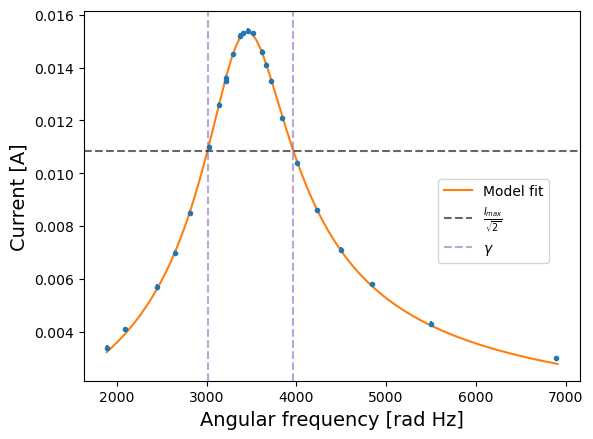

In [33]:
f_Q = np.array([550, 332, 421, 448, 482, 511, 524, 537, 542, 876, 770, 715, 
                673, 637, 611, 592, 583, 575, 560, 511, 500, 300, 389, 1097])
I_Q = np.array([15.4, 4.1, 7, 8.5, 11, 13.6, 14.5, 15.2, 15.3, 4.3, 5.8, 7.1, 
                8.6, 10.4, 12.1, 13.5, 14.1, 14.6, 15.3, 13.5, 12.6, 3.4, 5.7, 3]) * 10**(-3)
w_Q = f_Q * 2 * np.pi


freq_1_Q, freq_2_Q = 630*2*np.pi, 480*2*np.pi
gamma_Q = freq_1_Q - freq_2_Q
I_max_Q = 15.4e-3

w_array_Q = np.linspace(300, 1100, 1001) * 2*np.pi
params_guess_Q = [w0_want, gamma_Q, I_max_Q]
del_I_array_Q = np.ones_like(I_Q) * del_I

new_params_Q, pcov_Q = scipy.optimize.curve_fit(current_with_w, w_Q, I_Q, p0=params_guess_Q, sigma=del_I_array_Q, absolute_sigma=True)
params_err_Q = np.sqrt(np.diag(pcov_Q))
w0_Q_1, gamma_Q_1, I_max_Q_1 = new_params_Q[0], new_params_Q[1], new_params_Q[2]
del_w0_Q_1, del_gamma_Q_1, del_I_max_Q_1 = params_err_Q[0], params_err_Q[1], params_err_Q[2]
R_Q = gamma_Q_1 * L_exp
del_R_Q = get_del_R(L_exp, del_L_exp, gamma_Q_1, del_gamma_Q_1)
Q_exp, del_Q_exp = get_Q2(w0_Q_1, del_w0_Q_1, gamma_Q_1, del_gamma_Q_1)
print(f"Resonant angular frequency is w0 = ({w0_Q_1:.1f} ± {del_w0_Q_1:.1f}) rad Hz.")
print(f"f0 = ({w0_Q_1/(2*np.pi):.1f} ± {del_w0_Q_1/(2*np.pi):.1f}) Hz.")
print(f"Bandwidth is gamma = ({gamma_Q_1:.0f} ± {del_gamma_Q_1:.0f}) rad Hz.")
print(f"Max current is I_max = ({I_max_Q_1*10**3:.2f} ± {del_I_max_Q_1*10**3:.2f}) A.")
print(f"Resistance of the coil is R = ({R_Q:.1f} ± {del_R_Q:.1f}) ohms.")
print(f"The Q factor is {Q_exp:.3f} ± {del_Q_exp:.3f}.")

ax = plt.axes()
ax.errorbar(w_Q, I_Q, del_I, fmt=".")
ax.set_xlabel('Angular frequency [rad Hz]')
ax.set_ylabel('Current [A]')
ax.plot(w_array_Q, current_with_w(w_array_Q, *new_params_Q), label="Model fit")
ax.axhline(I_max_Q_1 / np.sqrt(2), color = 'k', alpha = 0.6, linestyle = '--', label="$\\frac{I_{max}}{\\sqrt{2}}$")
ax.axvline(freq_1_Q, color = 'C4', alpha = 0.6, linestyle = '--')
ax.axvline(freq_2_Q, color = 'C4', alpha = 0.6, linestyle = '--', label="$\\gamma$")
ax.ticklabel_format(useOffset=False)
ax.legend(bbox_to_anchor=(0.7,0.3))
ax.set_xlabel('Angular frequency [rad Hz]', fontsize=14)
ax.set_ylabel('Current [A]', fontsize=14)

In [9]:
wd_lowQ_theo = np.sqrt(w0_Q_1**2 - (gamma_Q_1/2)**2)   # lowQ is what should've been Q=5, but from our mistake is Q=3.607
fd_lowQ_theo = wd_lowQ_theo/(2*np.pi)
fd_lowQ_exp = 540                                      # Voltage across capacitor was at a max from frequencies 536 to 544 Hz
VCmax_lowQ_exp = 7.8                                   # Max voltage across capacitor
print(f"Low Q, theoretically {fd_lowQ_theo:.0f} Hz.")
print(f"Low Q, experimentally ({fd_lowQ_exp} ± 4) Hz.")

wd_highQ_theo = np.sqrt(w0_1**2 - (gamma_1/2)**2)     # highQ is Q factor before resistance was added, about Q = 22.190
fd_highQ_theo = wd_highQ_theo/(2*np.pi)
fd_highQ_exp = 550
VCmax_highQ_exp = 46                                  # Max voltage across capacitor
print(f"High Q, theoretically {fd_highQ_theo:.0f} Hz.")
print(f"High Q, experimentally {fd_highQ_exp} Hz.")

Low Q, theoretically 544 Hz.
Low Q, experimentally (540 ± 4) Hz.
High Q, theoretically 550 Hz.
High Q, experimentally 550 Hz.


1. With the variable resistor in the circuit, i.e. $Q=3.607$...

We calculated that we should have a max voltage across the capacitor at a frequency of $f_d=544$ Hz.

We experimentally found the frequency at max voltage across the capacitor was $f_d=(540 ± 4)$ Hz.

The uncertainty of $4$ Hz comes from the range of frequencies $536$ to $544$ Hz being at max voltage across capacitor.

Since the calculated value has some uncertainty with it too, these values agree.

2. With the variable resistor not in the circuit, i.e. $Q=22.190$...

We calculated that we should have a max voltage across the capacitor at a frequency of $f_d=550$ Hz.

We experimentally found the frequency at max voltage across the capacitor was $f_d=550$ Hz.

These values very much agree.

When the Q factor is this high, bandwidth ($\gamma$) is quite low and there is low energy loss, meaning there is little damping.

When lightly damped, damped resonant frequenucy is essentially the same as non-damped resonant frequency, i.e. $f_d\approx f_0=550$ Hz, which explains why it's still $550$ Hz.

## Conclusion

The aim of this experiment was to measure the bandwidth and Q factor of a resonance LRC series circuit, along with a lot of other small experimenting to gain experience with LRC circuits. 

We found $\omega_0 = (3457.31 ± 0.07)$ rad Hz ($f_0 =550.247 ± 0.012$ Hz), $\gamma = (161.22 ± 0.20)$ rad Hz, $I_{max} = (86.29 ± 0.04)$ mA. 

Using $\gamma = \frac{R}{L}$, the resistance of the coil is $R = (24.39 ± 0.09)$ ohms.
 
Using $Q = \frac{V_C}{V_s}$, we calculated $Q=22.2 ± 1.1$. We also calculated $Q=\frac{\omega_0}{\gamma}=21.444 ± 0.027$. These values agree with each other.

We found that Q factor decreases when increasing resistance. This makes sense, as increasing resistance increases the damping, which means more energy loss. 

Also, as damping decreases, the frequency at which the voltage across the capacitor is at a maximum gets closer to resonant frequency with no damping. At $Q\approx 5$, these frequencies are essentially equal. 

One error in the experiment was the disagreement between the total resistance of the ciruit with the variable resistor at $105$ ohms compared to what we calculated it should be. More data collection must be done to further investigate this. We also didn't confirm how close our calculation for required resistance to make $Q=5$. However, we were able to confirm the theory that Q factor should decrease by increasing resistance. 

A limitation of the experiment was that the inductor was very sensitive to movements or objects under or near the table. Any chairs or computers or notebooks moving nearby interferred with the inductance of the circuit. We did our best to be cautious, but consistent calibration checks on the inductance would reduce uncertainties caused from this. 